In [196]:
#Import base packages and settings

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#Only import this once
#Upload data for explanatory variables
census_df = pd.read_csv('pdb2019bgv3_us.csv', encoding='ISO-8859-1')

In [34]:
census_df.head(3)

,GIDBG,State,State_name,County,County_name,Tract,Block_group,Flag,LAND_AREA,AIAN_LAND,URBANIZED_AREA_POP_CEN_2010,URBAN_CLUSTER_POP_CEN_2010,RURAL_POP_CEN_2010,Tot_Population_CEN_2010,Tot_Population_ACS_13_17,Tot_Population_ACSMOE_13_17,Males_CEN_2010,Males_ACS_13_17,Males_ACSMOE_13_17,Females_CEN_2010,Females_ACS_13_17,Females_ACSMOE_13_17,Median_Age_ACS_13_17,Median_Age_ACSMOE_13_17,Pop_under_5_CEN_2010,Pop_under_5_ACS_13_17,Pop_under_5_ACSMOE_13_17,Pop_5_17_CEN_2010,Pop_5_17_ACS_13_17,Pop_5_17_ACSMOE_13_17,Pop_18_24_CEN_2010,Pop_18_24_ACS_13_17,Pop_18_24_ACSMOE_13_17,Pop_25_44_CEN_2010,Pop_25_44_ACS_13_17,Pop_25_44_ACSMOE_13_17,Pop_45_64_CEN_2010,Pop_45_64_ACS_13_17,Pop_45_64_ACSMOE_13_17,Pop_65plus_CEN_2010,Pop_65plus_ACS_13_17,Pop_65plus_ACSMOE_13_17,Tot_GQ_CEN_2010,Inst_GQ_CEN_2010,Non_Inst_GQ_CEN_2010,Hispanic_CEN_2010,Hispanic_ACS_13_17,Hispanic_ACSMOE_13_17,NH_White_alone_CEN_2010,NH_White_alone_ACS_13_17,NH_White_alone_ACSMOE_13_17,NH_Blk_alone_CEN_2010,NH_Blk_alone_ACS_13_17,NH_Blk_alone_ACSMOE_13_17,NH_AIAN_alone_CEN_2010,NH_AIAN_alone_ACS_13_17,NH_AIAN_alone_ACSMOE_13_17,NH_Asian_alone_CEN_2010,NH_Asian_alone_ACS_13_17,NH_Asian_alone_ACSMOE_13_17,NH_NHOPI_alone_CEN_2010,NH_NHOPI_alone_ACS_13_17,NH_NHOPI_alone_ACSMOE_13_17,NH_SOR_alone_CEN_2010,NH_SOR_alone_ACS_13_17,NH_SOR_alone_ACSMOE_13_17,Pop_5yrs_Over_ACS_13_17,Pop_5yrs_Over_ACSMOE_13_17,Othr_Lang_ACS_13_17,Othr_Lang_ACSMOE_13_17,Pop_25yrs_Over_ACS_13_17,Pop_25yrs_Over_ACSMOE_13_17,Not_HS_Grad_ACS_13_17,Not_HS_Grad_ACSMOE_13_17,College_ACS_13_17,College_ACSMOE_13_17,Pov_Univ_ACS_13_17,Pov_Univ_ACSMOE_13_17,Prs_Blw_Pov_Lev_ACS_13_17,Prs_Blw_Pov_Lev_ACSMOE_13_17,One_Health_Ins_ACS_13_17,One_Health_Ins_ACSMOE_13_17,Two_Plus_Health_Ins_ACS_13_17,Two_Plus_Health_Ins_ACSMOE_13_17,No_Health_Ins_ACS_13_17,No_Health_Ins_ACSMOE_13_17,Pop_1yr_Over_ACS_13_17,Pop_1yr_Over_ACSMOE_13_17,Diff_HU_1yr_Ago_ACS_13_17,Diff_HU_1yr_Ago_ACSMOE_13_17,ENG_VW_SPAN_ACS_13_17,ENG_VW_SPAN_ACSMOE_13_17,ENG_VW_INDO_EURO_ACS_13_17,ENG_VW_INDO_EURO_ACSMOE_13_17,ENG_VW_API_ACS_13_17,ENG_VW_API_ACSMOE_13_17,ENG_VW_OTHER_ACS_13_17,ENG_VW_OTHER_ACSMOE_13_17,ENG_VW_ACS_13_17,ENG_VW_ACSMOE_13_17,Rel_Family_HHD_CEN_2010,Rel_Family_HHD_ACS_13_17,Rel_Family_HHD_ACSMOE_13_17,MrdCple_Fmly_HHD_CEN_2010,MrdCple_Fmly_HHD_ACS_13_17,MrdCple_Fmly_HHD_ACSMOE_13_17,Not_MrdCple_HHD_CEN_2010,Not_MrdCple_HHD_ACS_13_17,Not_MrdCple_HHD_ACSMOE_13_17,Female_No_HB_CEN_2010,Female_No_HB_ACS_13_17,Female_No_HB_ACSMOE_13_17,NonFamily_HHD_CEN_2010,NonFamily_HHD_ACS_13_17,NonFamily_HHD_ACSMOE_13_17,Sngl_Prns_HHD_CEN_2010,Sngl_Prns_HHD_ACS_13_17,Sngl_Prns_HHD_ACSMOE_13_17,HHD_PPL_Und_18_CEN_2010,HHD_PPL_Und_18_ACS_13_17,HHD_PPL_Und_18_ACSMOE_13_17,Tot_Prns_in_HHD_CEN_2010,Tot_Prns_in_HHD_ACS_13_17,Tot_Prns_in_HHD_ACSMOE_13_17,Rel_Child_Under_6_CEN_2010,Rel_Child_Under_6_ACS_13_17,Rel_Child_Under_6_ACSMOE_13_17,HHD_Moved_in_ACS_13_17,HHD_Moved_in_ACSMOE_13_17,PUB_ASST_INC_ACS_13_17,PUB_ASST_INC_ACSMOE_13_17,Med_HHD_Inc_BG_ACS_13_17,Med_HHD_Inc_BG_ACSMOE_13_17,Med_HHD_Inc_TR_ACS_13_17,Med_HHD_Inc_TR_ACSMOE_13_17,Aggregate_HH_INC_ACS_13_17,Aggregate_HH_INC_ACSMOE_13_17,Tot_Housing_Units_CEN_2010,Tot_Housing_Units_ACS_13_17,Tot_Housing_Units_ACSMOE_13_17,Tot_Occp_Units_CEN_2010,Tot_Occp_Units_ACS_13_17,Tot_Occp_Units_ACSMOE_13_17,Tot_Vacant_Units_CEN_2010,Tot_Vacant_Units_ACS_13_17,Tot_Vacant_Units_ACSMOE_13_17,Renter_Occp_HU_CEN_2010,Renter_Occp_HU_ACS_13_17,Renter_Occp_HU_ACSMOE_13_17,Owner_Occp_HU_CEN_2010,Owner_Occp_HU_ACS_13_17,Owner_Occp_HU_ACSMOE_13_17,Single_Unit_ACS_13_17,Single_Unit_ACSMOE_13_17,MLT_U2_9_STRC_ACS_13_17,MLT_U2_9_STRC_ACSMOE_13_17,MLT_U10p_ACS_13_17,MLT_U10p_ACSMOE_13_17,Mobile_Homes_ACS_13_17,Mobile_Homes_ACSMOE_13_17,Crowd_Occp_U_ACS_13_17,Crowd_Occp_U_ACSMOE_13_17,Occp_U_NO_PH_SRVC_ACS_13_17,Occp_U_NO_PH_SRVC_ACSMOE_13_17,No_Plumb_ACS_13_17,No_Plumb_ACSMOE_13_17,Recent_Built_HU_ACS_13_17,Recent_Built_HU_ACSMOE_13_17,Med_House_Value_BG_ACS_13_17,Med_House_Value_BG_ACSMOE_13_17,Med_House_Value_TR_ACS_13_

In [10]:
#Upload data for target variable

TRI_df = pd.read_csv('2017_Industrial_Target.csv')
TRI_df = TRI_df.drop(columns='Unnamed: 0', axis=1)

In [33]:
TRI_df.head(3)

,30. CHEMICAL,FIPS,Target
0,AMMONIA,600109505001005,1
1,FORMALDEHYDE,600109505001005,1
2,POLYCYCLIC AROMATIC COMPOUNDS,600109505001005,1


In [14]:
#Drop Columns with NA Fips Codes, changes FIPs to integer type
TRI_df = TRI_df.dropna(subset=['FIPS'])
TRI_df['FIPS'] = TRI_df['FIPS'].astype(dtype=int)

In [35]:
TRI_df.head(3)

,30. CHEMICAL,FIPS,Target
0,AMMONIA,600109505001005,1
1,FORMALDEHYDE,600109505001005,1
2,POLYCYCLIC AROMATIC COMPOUNDS,600109505001005,1


In [42]:
#Check census_df for missing data

census_df.isna().mean().round(4)

GIDBG                               0.0000
State                               0.0000
State_name                          0.0000
County                              0.0000
County_name                         0.0000
Tract                               0.0000
Block_group                         0.0000
Flag                                0.9973
LAND_AREA                           0.0001
AIAN_LAND                           0.0001
URBANIZED_AREA_POP_CEN_2010         0.0001
URBAN_CLUSTER_POP_CEN_2010          0.0001
RURAL_POP_CEN_2010                  0.0001
Tot_Population_CEN_2010             0.0001
Tot_Population_ACS_13_17            0.0001
Tot_Population_ACSMOE_13_17         0.0001
Males_CEN_2010                      0.0001
Males_ACS_13_17                     0.0001
Males_ACSMOE_13_17                  0.0001
Females_CEN_2010                    0.0001
Females_ACS_13_17                   0.0001
Females_ACSMOE_13_17                0.0001
Median_Age_ACS_13_17                0.0055
Median_Age_

In [208]:
#These are the final explanatory variables to be used in the analysis
#Columns with more than 15% missing were dropped
#Further analysis was done to select these variables
#About 130 variables dropped from original dataset

final_columns_df = pd.read_csv('XG_final_columns_list.csv')
final_columns_list = list(final_columns_df['0'])

final_var_df = census_df[final_columns_list]

In [209]:
final_var_df.isna().sum()

GIDBG                                   0
State                                   0
County                                  0
Tract                                   0
Block_group                             0
LAND_AREA                              23
AIAN_LAND                              23
URBANIZED_AREA_POP_CEN_2010            23
URBAN_CLUSTER_POP_CEN_2010             23
RURAL_POP_CEN_2010                     23
Tot_Population_CEN_2010                23
Tot_Population_ACS_13_17               24
Males_CEN_2010                         23
Males_ACS_13_17                        24
Females_CEN_2010                       23
Females_ACS_13_17                      24
Median_Age_ACS_13_17                 1201
Pop_under_5_CEN_2010                   23
Pop_under_5_ACS_13_17                  24
Pop_5_17_CEN_2010                      23
Pop_5_17_ACS_13_17                     24
Pop_18_24_CEN_2010                     23
Pop_18_24_ACS_13_17                    24
Pop_25_44_CEN_2010                

In [47]:
final_var_df.dtypes

GIDBG                                 int64
State                                 int64
County                                int64
Tract                                 int64
Block_group                           int64
LAND_AREA                           float64
AIAN_LAND                           float64
URBANIZED_AREA_POP_CEN_2010         float64
URBAN_CLUSTER_POP_CEN_2010          float64
RURAL_POP_CEN_2010                  float64
Tot_Population_CEN_2010             float64
Tot_Population_ACS_13_17            float64
Males_CEN_2010                      float64
Males_ACS_13_17                     float64
Females_CEN_2010                    float64
Females_ACS_13_17                   float64
Median_Age_ACS_13_17                float64
Pop_under_5_CEN_2010                float64
Pop_under_5_ACS_13_17               float64
Pop_5_17_CEN_2010                   float64
Pop_5_17_ACS_13_17                  float64
Pop_18_24_CEN_2010                  float64
Pop_18_24_ACS_13_17             

In [48]:
#The object types need to be cleaned to be float variables
string_money_df = final_var_df.select_dtypes(include=['object'])
string_money_df.head()

,Med_HHD_Inc_BG_ACS_13_17,Med_HHD_Inc_TR_ACS_13_17,Aggregate_HH_INC_ACS_13_17,Med_House_Value_BG_ACS_13_17,Med_House_Value_TR_ACS_13_17,Aggr_House_Value_ACS_13_17,avg_Agg_HH_INC_ACS_13_17,avg_Agg_House_Value_ACS_13_17
0,"$34,907","$67,826","$17,208,200",NaN,"$152,500","$25,173,000","$57,361","$83,910"
1,"$76,875","$67,826","$43,619,500","$158,800","$152,500","$64,420,000","$96,078","$141,894"
2,"$24,063","$41,287","$14,407,000","$98,300","$96,100","$48,574,600","$38,013","$128,165"
3,"$48,382","$41,287","$24,884,600","$92,000","$96,100","$34,913,000","$61,596","$86,418"
4,"$55,476","$46,806","$51,549,900","$98,700","$98,900","$82,592,400","$59,389","$95,153"


In [49]:
#This removes commas and $ signs from string_money_df
#Cleaned strings are then assigned to float values

import re
string_money_df = string_money_df.applymap(lambda x: re.sub(r'[^a-zA-Z0-9 -]', '', str(x)))
string_money_df_cleaned = string_money_df.astype(dtype=float)
string_money_df_cleaned.head()

,Med_HHD_Inc_BG_ACS_13_17,Med_HHD_Inc_TR_ACS_13_17,Aggregate_HH_INC_ACS_13_17,Med_House_Value_BG_ACS_13_17,Med_House_Value_TR_ACS_13_17,Aggr_House_Value_ACS_13_17,avg_Agg_HH_INC_ACS_13_17,avg_Agg_House_Value_ACS_13_17
0,34907.0,67826.0,17208200.0,NaN,152500.0,25173000.0,57361.0,83910.0
1,76875.0,67826.0,43619500.0,158800.0,152500.0,64420000.0,96078.0,141894.0
2,24063.0,41287.0,14407000.0,98300.0,96100.0,48574600.0,38013.0,128165.0
3,48382.0,41287.0,24884600.0,92000.0,96100.0,34913000.0,61596.0,86418.0
4,55476.0,46806.0,51549900.0,98700.0,98900.0,82592400.0,59389.0,95153.0


In [197]:
#Update cleaned values for objects in final_var_df

string_money_list= list(string_money_df.columns)
final_var_df.drop(columns= string_money_list, inplace=True)
final_var_df = pd.concat([final_var_df,string_money_df_cleaned], axis=1)

In [51]:
final_var_df.dtypes

GIDBG                                 int64
State                                 int64
County                                int64
Tract                                 int64
Block_group                           int64
LAND_AREA                           float64
AIAN_LAND                           float64
URBANIZED_AREA_POP_CEN_2010         float64
URBAN_CLUSTER_POP_CEN_2010          float64
RURAL_POP_CEN_2010                  float64
Tot_Population_CEN_2010             float64
Tot_Population_ACS_13_17            float64
Males_CEN_2010                      float64
Males_ACS_13_17                     float64
Females_CEN_2010                    float64
Females_ACS_13_17                   float64
Median_Age_ACS_13_17                float64
Pop_under_5_CEN_2010                float64
Pop_under_5_ACS_13_17               float64
Pop_5_17_CEN_2010                   float64
Pop_5_17_ACS_13_17                  float64
Pop_18_24_CEN_2010                  float64
Pop_18_24_ACS_13_17             

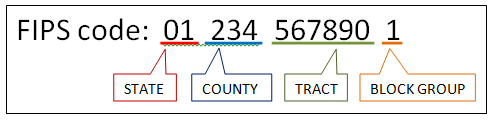

In [61]:
#Note that the fips codes for block groups are 11 or 12 digits long
#TRI_df fips codes are at block level and are 15 digits long

from IPython.display import Image
Image("/Users/Mango/Desktop/Screenshots/FIPSCode_Part4.png")

In [66]:
#Get Target FIPs codes ready to merge
#data type needs to be string for manipulation
string_fips = TRI_df['FIPS'].astype(dtype = str)

#This reduces fips code to the block group level
string_fips_sliced = string_fips.str.slice(0,-3)

string_fips.str.slice(0,-3)

TRI_df['Sliced_Fips'] = string_fips.str.slice(0,-3)

#This puts fips code back into original integer datatype
TRI_df['Sliced_Fips'] = TRI_df['Sliced_Fips'].astype(dtype= int)

#This groups blocks into census block groups
TRI_df_groupby = TRI_df.groupby('Sliced_Fips').aggregate(np.median)

In [75]:
#This is dataframe includes target variable and all explanatory variables
df_with_target = pd.merge(final_var_df,  TRI_df_groupby,  how='left', left_on='GIDBG', right_index=True)

In [77]:
#Remove unneeded FIPS column
#Replace nan target values with 0
df_with_target['Target'].replace(np.nan, 0, inplace=True)
df_with_target['Target'] = df_with_target['Target'].astype(dtype=int)
df_with_target.drop(columns='FIPS',inplace=True)

In [78]:
#Check target var for no missing values
df_with_target.isna().sum().tail(5)

Med_House_Value_TR_ACS_13_17      3262
Aggr_House_Value_ACS_13_17       27796
avg_Agg_HH_INC_ACS_13_17          1892
avg_Agg_House_Value_ACS_13_17    27796
Target                               0
dtype: int64

In [ ]:
# This creates a two column target variable dataframe that can be exported
#export_df_with_target = df_with_target[['GIDBG', 'Target']]
#export_df_with_target.rename(columns={'Target':'Actual_Target_Values'},inplace=True)
#export_df_with_target['Actual_Target_Values'] = export_df_with_target['Actual_Target_Values'].astype(dtype=int, inplace=True)

In [212]:
#exports target dataframe to csv
#export_df_with_target.head()
#export_df_with_target.to_csv('export_df_with_target.csv')

In [79]:
#check final df data types
df_with_target.dtypes.head(6)

GIDBG            int64
State            int64
County           int64
Tract            int64
Block_group      int64
LAND_AREA      float64
dtype: object

In [81]:
#All integer categories have full values
df_with_target.isna().sum().head(6)

GIDBG           0
State           0
County          0
Tract           0
Block_group     0
LAND_AREA      23
dtype: int64

In [82]:
#This line of code imputes mean value of column for every column in dataframe

testing_df = df_with_target
for i in range(0, len(df_with_target.columns)):
    if df_with_target.dtypes[i] == 'float64':
        testing_df.iloc[:,i].replace(np.NaN, testing_df.iloc[:,i].mean(), inplace=True)
    elif df_with_target.dtypes[i] == 'int64':
        testing_df.iloc[:,i].replace(np.NaN, testing_df.iloc[:,i].median(), inplace=True)
    else:
        pass    

In [210]:
#Evaluate categorical ("integer types in testing_df") data
#I chose to drop all except County
#County has ~3000 levels and needs to be dummied
testing_df.iloc[:,:5].head(3)

,GIDBG,State,County,Tract,Block_group
0,10010201001,1,1,20100,1
1,10010201002,1,1,20100,2
2,10010202001,1,1,20200,1


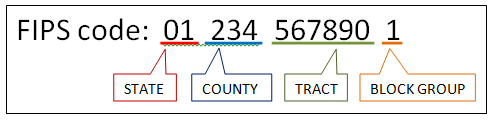

In [83]:
#Note that the fips codes for block groups are 11 or 12 digits long
#TRI_df fips codes are at block level and are 15 digits long

from IPython.display import Image
Image("/Users/Mango/Desktop/Screenshots/FIPSCode_Part4.png")

In [85]:
#We create unique county fips indicators by removing 7 more digits from the FIP address
#A new variable is created with county id for each row in the testing_df

testing_df_county = testing_df['GIDBG'].astype(dtype=str)
county_fips = testing_df_county.str[:-7]
testing_df_county = pd.DataFrame({'County_Fips' : county_fips})

In [86]:
testing_df_county.head()

,County_Fips
0,1001
1,1001
2,1001
3,1001
4,1001


In [88]:
#New variable County_Fips is then dummied
dummy_counties = pd.get_dummies(testing_df_county, drop_first=True)

In [213]:
#New variable has the correct length
len(dummy_counties)

220357

In [214]:
#This is the length of the target variable
target_df = df_with_target['Target']
len(target_df)

220357

In [215]:
#New variable has the correct number of counties
len(dummy_counties.columns)

3219

In [216]:
#This creates dataframe of all explanatory variables

X_dataframe_unfinished = testing_df.drop(columns= ["GIDBG", "State", "County", "Tract", "Block_group", "Target"])
len(X_dataframe)

220357

In [217]:
#This adds dummy_counties to explanatory variable dataframe

training_data_dummied = pd.merge(X_dataframe, dummy_counties, how="left", left_index=True, right_index=True)

In [218]:
training_data_dummied.head()

,LAND_AREA,AIAN_LAND,URBANIZED_AREA_POP_CEN_2010,URBAN_CLUSTER_POP_CEN_2010,RURAL_POP_CEN_2010,Tot_Population_CEN_2010,Tot_Population_ACS_13_17,Males_CEN_2010,Males_ACS_13_17,Females_CEN_2010,Females_ACS_13_17,Median_Age_ACS_13_17,Pop_under_5_CEN_2010,Pop_under_5_ACS_13_17,Pop_5_17_CEN_2010,Pop_5_17_ACS_13_17,Pop_18_24_CEN_2010,Pop_18_24_ACS_13_17,Pop_25_44_CEN_2010,Pop_25_44_ACS_13_17,Pop_45_64_CEN_2010,Pop_45_64_ACS_13_17,Pop_65plus_CEN_2010,Pop_65plus_ACS_13_17,Tot_GQ_CEN_2010,Inst_GQ_CEN_2010,Non_Inst_GQ_CEN_2010,Hispanic_CEN_2010,Hispanic_ACS_13_17,NH_White_alone_CEN_2010,NH_White_alone_ACS_13_17,NH_Blk_alone_CEN_2010,NH_Blk_alone_ACS_13_17,NH_AIAN_alone_CEN_2010,NH_AIAN_alone_ACS_13_17,NH_Asian_alone_CEN_2010,NH_Asian_alone_ACS_13_17,NH_NHOPI_alone_CEN_2010,NH_NHOPI_alone_ACS_13_17,NH_SOR_alone_CEN_2010,NH_SOR_alone_ACS_13_17,Pop_5yrs_Over_ACS_13_17,Othr_Lang_ACS_13_17,Pop_25yrs_Over_ACS_13_17,Not_HS_Grad_ACS_13_17,College_ACS_13_17,Pov_Univ_ACS_13_17,Prs_Blw_Pov_Lev_ACS_13_17,One_Health_Ins_ACS_13_17,Two_Plus_Health_Ins_ACS_13_17,No_Health_Ins_ACS_13_17,Pop_1yr_Over_ACS_13_17,Diff_HU_1yr_Ago_ACS_13_17,ENG_VW_SPAN_ACS_13_17,ENG_VW_INDO_EURO_ACS_13_17,ENG_VW_API_ACS_13_17,ENG_VW_OTHER_ACS_13_17,ENG_VW_ACS_13_17,Rel_Family_HHD_CEN_2010,Rel_Family_HHD_ACS_13_17,MrdCple_Fmly_HHD_CEN_2010,MrdCple_Fmly_HHD_ACS_13_17,Not_MrdCple_HHD_CEN_2010,Not_MrdCple_HHD_ACS_13_17,Female_No_HB_CEN_2010,Female_No_HB_ACS_13_17,NonFamily_HHD_CEN_2010,NonFamily_HHD_ACS_13_17,Sngl_Prns_HHD_CEN_2010,Sngl_Prns_HHD_ACS_13_17,HHD_PPL_Und_18_CEN_2010,HHD_PPL_Und_18_ACS_13_17,Tot_Prns_in_HHD_CEN_2010,Tot_Prns_in_HHD_ACS_13_17,Rel_Child_Under_6_CEN_2010,Rel_Child_Under_6_ACS_13_17,HHD_Moved_in_ACS_13_17,PUB_ASST_INC_ACS_13_17,Tot_Housing_Units_CEN_2010,Tot_Housing_Units_ACS_13_17,Tot_Occp_Units_CEN_2010,Tot_Occp_Units_ACS_13_17,Tot_Vacant_Units_CEN_2010,Tot_Vacant_Units_ACS_13_17,Renter_Occp_HU_CEN_2010,Renter_Occp_HU_ACS_13_17,Owner_Occp_HU_CEN_2010,Owner_Occp_HU_ACS_13_17,Single_Unit_ACS_13_17,MLT_U2_9_STRC_ACS_13_17,MLT_U10p_ACS_13_17,Mobile_Homes_ACS_13_17,Crowd_Occp_U_ACS_13_17,Occp_U_NO_PH_SRVC_ACS_13_17,No_Plumb_ACS_13_17,Recent_Built_HU_ACS_13_17,MailBack_Area_Count_CEN_2010,Census_Mail_Returns_CEN_2010,Vacants_CEN_2010,Deletes_CEN_2010,Census_UAA_CEN_2010,Valid_Mailback_Count_CEN_2010,FRST_FRMS_CEN_2010,RPLCMNT_FRMS_CEN_2010,Mail_Return_Rate_CEN_2010,Low_Response_Score,pct_URBANIZED_AREA_POP_CEN_2010,pct_URBAN_CLUSTER_POP_CEN_2010,pct_RURAL_POP_CEN_2010,pct_Males_CEN_2010,pct_Males_ACS_13_17,pct_Females_CEN_2010,pct_Females_ACS_13_17,pct_Pop_under_5_CEN_2010,pct_Pop_under_5_ACS_13_17,pct_Pop_5_17_CEN_2010,pct_Pop_5_17_ACS_13_17,pct_Pop_18_24_CEN_2010,pct_Pop_18_24_ACS_13_17,pct_Pop_25_44_CEN_2010,pct_Pop_25_44_ACS_13_17,pct_Pop_45_64_CEN_2010,pct_Pop_45_64_ACS_13_17,pct_Pop_65plus_CEN_2010,pct_Pop_65plus_ACS_13_17,pct_Tot_GQ_CEN_2010,pct_Inst_GQ_CEN_2010,pct_Non_Inst_GQ_CEN_2010,pct_Hispanic_CEN_2010,pct_Hispanic_ACS_13_17,pct_NH_White_alone_CEN_2010,pct_NH_White_alone_ACS_13_17,pct_NH_Blk_alone_CEN_2010,pct_NH_Blk_alone_ACS_13_17,pct_NH_AIAN_alone_CEN_2010,pct_NH_AIAN_alone_ACS_13_17,pct_NH_Asian_alone_CEN_2010,pct_NH_Asian_alone_ACS_13_17,pct_NH_NHOPI_alone_CEN_2010,pct_NH_NHOPI_alone_ACS_13_17,pct_NH_SOR_alone_CEN_2010,pct_NH_SOR_alone_ACS_13_17,pct_Pop_5yrs_Over_ACS_13_17,pct_Othr_Lang_ACS_13_17,pct_Pop_25yrs_Over_ACS_13_17,pct_Not_HS_Grad_ACS_13_17,pct_College_ACS_13_17,pct_Pov_Univ_ACS_13_17,pct_Prs_Blw_Pov_Lev_ACS_13_17,pct_One_Health_Ins_ACS_13_17,pct_TwoPHealthIns_ACS_13_17,pct_No_Health_Ins_ACS_13_17,pct_Pop_1yr_Over_ACS_13_17,pct_Diff_HU_1yr_Ago_ACS_13_17,pct_ENG_VW_SPAN_ACS_13_17,pct_ENG_VW_INDOEURO_ACS_13_17,pct_ENG_VW_API_ACS_13_17,pct_ENG_VW_OTHER_ACS_13_17,pct_ENG_VW_ACS_13_17,pct_Rel_Family_HHD_CEN_2010,pct_Rel_Family_HHD_ACS_13_17,pct_MrdCple_HHD_CEN_2010,pct_MrdCple_HHD_ACS_13_17,pct_Not_MrdCple_HHD_CEN_2010,pct_Not_MrdCple_HHD_ACS_13_17,pct_Female_No_HB_CEN_2010,pct_Female_No_HB_ACS_13_17,pct_NonFamily_HHD_CEN_2010,pct_NonFa

In [219]:
#Identify dataframes to scale and prepare for train test split
df_X_unscaled = training_data_dummied
df_y = target_df.astype(dtype=int)

In [220]:
#This Standard Scales Explanatory Variables

from sklearn import preprocessing
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
df_x_scaled = scaler.fit_transform(df_X_unscaled)
df_x_scaled = pd.DataFrame(df_X_unscaled, columns=df_X.columns)

In [221]:
#The target variable is very unbalanced
#To improve model performance weights can be assigned to the minority class
#XGboost requires a list or array of weights for each row of the target variable

In [222]:
##This block of code determines optimum weights for 0 and 1 values of the model
#The goal is to weight the minority class to a 1:1 ratio with the majority class
#weights data is the list of weights for each row of the target variable

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x_scaled, df_y, test_size=0.5, random_state=134)

weight_ratio =  len(y_train[y_train==1])/len((y_train))
weight_multiplier = (0.5/weight_ratio) - 1
weights_data = (y_train*weight_multiplier)+1
weights_data=list(weights_data)
y_train_list = list(y_train)
y_test_list = list(y_test)

In [223]:
#This creates a DM
import xgboost as xgb

#D_train was used to create the predictive model
#D_all was used to create the visualization probabilities
D_all = xgb.DMatrix(x_train, label=y_train, weight=weights_data)

#This is the data the best model used to train and test
#D_train = xgb.DMatrix(x_train, label=y_train, weight=weights_data)
D_test = xgb.DMatrix(x_test, label=y_test)

In [224]:
#Define XGBoost Model
#eval_set = {}
#watchlist = [(D_train, 'train'), (D_test, 'test')]
#model = xgb.train(param, D_train, steps, evals=watchlist, evals_result=eval_set)

In [131]:
#These were trained model params
#param = {
    #'eta': 0.2,
    #'learning_rate' : 0.005,
    #'max_depth': 10,
    #'objective': 'multi:softprob',  
    #'num_class': 2,
    #'subsample': 0.8,
    #'colsample_bytree' : 0.7,
    #} 
#steps = 500

In [ ]:
#Create XGBoost training visualization
#import matplotlib.pyplot as plt

# plot classification error
#iterations = len(eval_set['train']['merror'])
#x_axis = range(0, iterations)
#fig, ax = plt.subplots()
#ax.plot(x_axis, eval_set['train']['merror'], label='Train')
#ax.plot(x_axis, eval_set['test']['merror'], label='Test')
#ax.legend()
#plt.ylabel('Classification Error')
#plt.title('XGBoost Classification Error')
#plt.show()

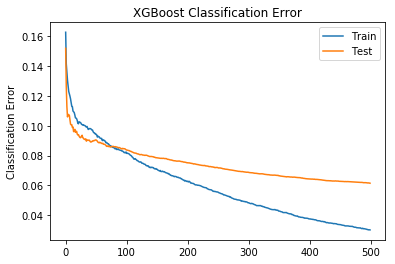

In [137]:
#This is the training of model100
#Training took about 7 hours

from IPython.display import Image
Image("/Users/Mango/Desktop/Memes/XGboost_Classification_Error.png")

In [225]:
#Create best features visualization

#import matplotlib.pyplot as plt
#%matplotlib inline

#fig, ax = plt.subplots(figsize=(12,18))
#xgb.plot_importance(model100, max_num_features=20, height=0.8, ax=ax)
#plt.show()

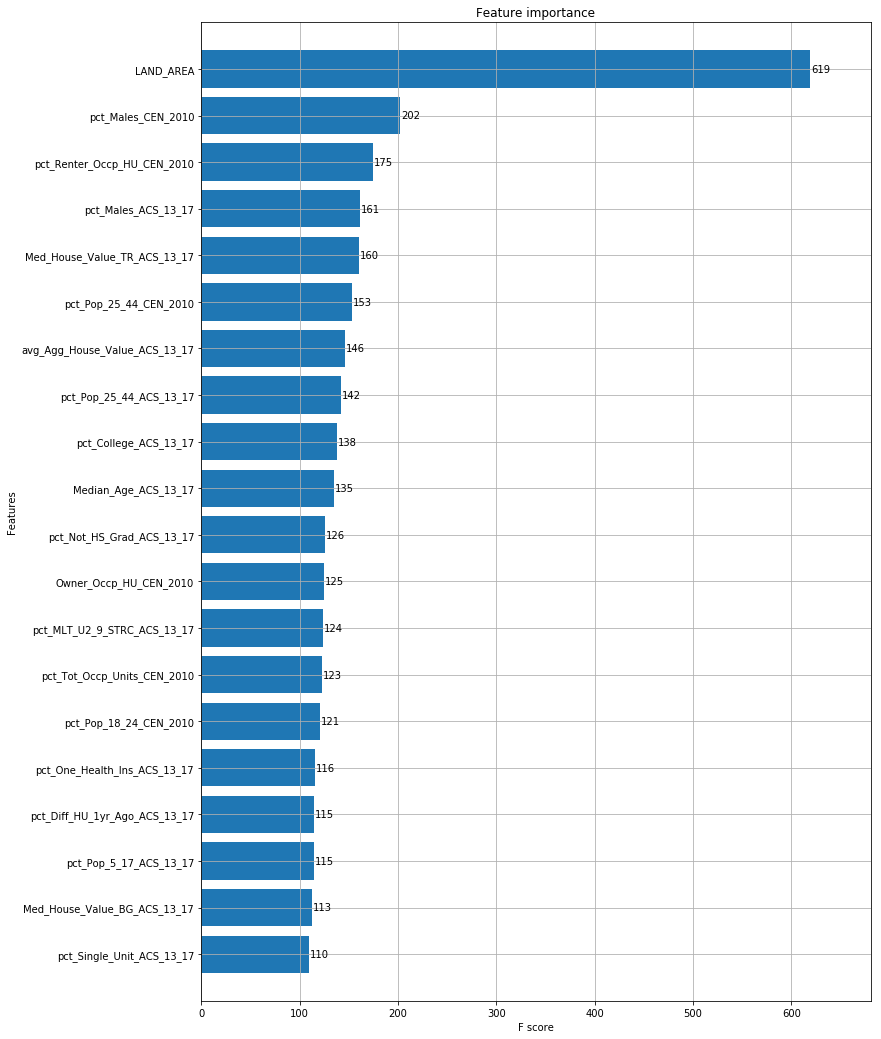

In [138]:
#This is the training of model100
#Training took about 7 hours

Image("/Users/Mango/Desktop/Memes/Feature_importance.XG.png")

In [157]:
#This Creates the confusion reported
#from sklearn.metrics import confusion_matrix

#threshold = 0.514604
#predicted = (preds100all[:,1] >= threshold)
#cm = confusion_matrix(df_y, predicted)

In [226]:
##This creates confusion matrix visualization

#import matplotlib.pylab as plt
#import itertools
#import numpy as np

#def plot_confusion_matrix(cm, classes,normalize=False):
    #plt.figure(figsize = (5,5))
    #plt.imshow(cm, interpolation='nearest', cmap=plt.cm.cividis_r)
    #plt.title('Confusion matrix')
    #tick_marks = np.arange(len(classes))
    #plt.xticks(tick_marks, classes, rotation=90)
    #plt.yticks(tick_marks, classes)
    #if normalize:
        #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    #thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        #plt.text(j, i, cm[i, j],
                 #horizontalalignment="center",
                 #color="white" if cm[i, j] > thresh else "black")
    #plt.tight_layout()
    #plt.ylabel('Actual')
    #plt.xlabel('Predicted')

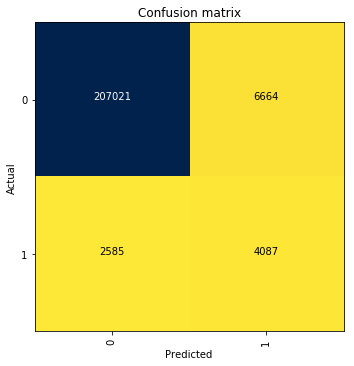

In [194]:
Image("/Users/Mango/Desktop/Screenshots/Confusion_Matrix.png")

In [124]:
#Calculation for Specificity
4087/(4087+6664)

0.3801506836573342

In [123]:
#calculation for Sensitivity
4087/(4087+2585)

0.6125599520383693

In [122]:
#calculation for Accuracy
(4087+207021)/(4087+2585+6664+207021)

0.958027201314231

In [93]:
#Gather Training Probabilities

#preds100train_df = pd.DataFrame(preds100train)
#preds100train_df.rename(columns={0: "0_probs", 1: "Target_probs"}, inplace=True)

#Merging_holder = pd.concat([pd.DataFrame(x_train.index), preds100train_df], axis=1)

In [ ]:
#Gather Testing Probabilities

#preds100test = model100.predict(D_test)

#preds100test_df = pd.DataFrame(preds100test)
#preds100test_df.rename(columns={0: "0_probs", 1: "Target_probs"}, inplace=True)

#Merging_holder2 = pd.concat([pd.DataFrame(x_test.index), preds100test_df], axis=1)
#Merging_holder2.rename(columns={0: "index"}, inplace=True)

In [106]:
#Create list of all probabilities
#final_merger = pd.concat([Merging_holder, Merging_holder2], axis=0)

#type(final_merger)

In [111]:
#Merge probabilities with fips code

#fips_code_df = pd.DataFrame(df_with_target['GIDBG'])

#final_merger_with_fips = pd.merge(fips_code_df, final_merger, how='left', left_index=True, right_on='index')

#length is correct
#len(final_merger_with_fips)

In [118]:
#final_merger_with_fips.head()

,GIDBG,index,0_probs,Target_probs
7882,10010201001,0,0.547162,0.452838
30346,10010201002,1,0.656930,0.343070
75461,10010202001,2,0.563083,0.436917
84286,10010202002,3,0.749175,0.250825
7942,10010203001,4,0.868757,0.131243


In [115]:
#Export csv
#final_merger_with_fips.to_csv('final_merger_with_fips.csv')

In [ ]:
#model.save_model('500Iteration.model')

In [ ]:
#import json

#with open('500Iteration_eval_set.json', 'w') as fp:
    #json.dump(eval_set, fp, sort_keys=True, indent=4)

In [ ]:
#model100 = xgb.Booster({'nthread':4}) #init model
#model100.load_model("500Iteration.model") # load data